# QBUS6830 Tutorial Lab 13: Forecasting 1 day ahead ES and Reg-GARCH models

## Data

#### The file `ao_yf_2009_2021.csv` contains the daily values (open, high, low, close) for the All Ordinaries index on the ASX from January, 2009 to July, 2021.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

from arch import arch_model

import sys

import yfinance as yf
import os

In [2]:
from lab13_helpers import *

### Q1 (VaR and ES forecasting, h = 1) 

#### Generate 1-step-ahead VaR and ES forecasts for the last 1000 days of AORD returns, using the models: GARCH, GJR, EGARCH, with both Gaussian and Student-t errors; as well as RM and HS-100 . Update parameter estimates every 20 days.

In [3]:
# Download AORD data
name_ao = 'ao_yf_2009_2021.csv'
if not os.path.isfile(name_ao):
    data_ao = yf.download("^AORD", start='2009-01-01', end='2021-10-23')
    data_ao.to_csv(name_ao)

In [4]:
data_ao = pd.read_csv(name_ao, index_col='Date', parse_dates=True, dayfirst=True)
r_ao = 100 * np.log(data_ao['Adj Close']).diff().dropna()

In [28]:
# Last day of in-sample period
last_in = '2017-11-09'

# First day of forecasting period
frst_fc = '2017-11-10'

In [6]:
n_fore = len(r_ao[frst_fc:])
n_wind = len(r_ao[:last_in])

var25_garch = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
var1_garch = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

es25_garch = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
es1_garch = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

s_garch = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

garch = arch_model(r_ao, mean='Constant', vol='GARCH', p=1, q=1, dist='Normal')

for i in range(n_fore):
    if i % 20 == 0:
        garch_fit = garch.fit(first_obs=i, last_obs=i + n_wind, disp="off")
    
        fc = garch_fit.forecast(horizon=1, align='target', reindex=False)
        temp25 = fc.mean + np.sqrt(fc.variance) * qn(0.025)
        temp1 = fc.mean + np.sqrt(fc.variance) * qn(0.01)
        
        s = np.sqrt(fc.variance)
        es25 = fc.mean + s * esn(0.025)
        es1 = fc.mean + s * esn(0.01)
    
    var25_garch[i] = temp25.loc[var25_garch.index[i]]
    var1_garch[i] = temp1.loc[var1_garch.index[i]]
    
    es25_garch[i] = es25.loc[es25_garch.index[i]]
    es1_garch[i] = es1.loc[es1_garch.index[i]]
    
    s_garch[i] = s.loc[s_garch.index[i]]

In [7]:
n_fore = len(r_ao[frst_fc:])
n_wind = len(r_ao[:last_in])

var25_garch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
var1_garch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

es25_garch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
es1_garch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

s_garch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

df_garch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

garch_t = arch_model(r_ao, mean='Constant', vol='GARCH', p=1, q=1, dist='StudentsT')

for i in tqdm(range(n_fore)):
    if i % 20 == 0:
        garch_t_fit = garch_t.fit(first_obs=i, last_obs=i + n_wind, disp="off")
    
        fc = garch_t_fit.forecast(horizon=1, align='target', reindex=False)
        temp25 = fc.mean + np.sqrt(fc.variance) * qt(0.025, garch_t_fit.params['nu'])
        temp1 = fc.mean + np.sqrt(fc.variance) * qt(0.01, garch_t_fit.params['nu'])
        
        s = np.sqrt(fc.variance)
        es25 = fc.mean + s * est(0.025, garch_t_fit.params['nu'])
        es1 = fc.mean + s * est(0.01, garch_t_fit.params['nu'])
        
        
    var25_garch_t[i] = temp25.loc[var25_garch_t.index[i]]
    var1_garch_t[i] = temp1.loc[var1_garch_t.index[i]]
    
    es25_garch_t[i] = es25.loc[es25_garch_t.index[i]]
    es1_garch_t[i] = es1.loc[es1_garch_t.index[i]]
    
    s_garch_t[i] = s.loc[s_garch_t.index[i]]
    
    df_garch_t[i] = garch_t_fit.params['nu']

  0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
n_fore = len(r_ao[frst_fc:])
n_wind = len(r_ao[:last_in])

var25_gjr = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
var1_gjr = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

es25_gjr = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
es1_gjr = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

s_gjr = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

gjr = arch_model(r_ao, mean='Constant', vol='GARCH', p=1, o=1, q=1, dist='Normal')

for i in tqdm(range(n_fore)):
    if i % 20 == 0:
        gjr_fit = gjr.fit(first_obs=i, last_obs=i + n_wind, disp="off")
    
        fc = gjr_fit.forecast(horizon=1, align='target', reindex=False)
        temp25 = fc.mean + np.sqrt(fc.variance) * qn(0.025)
        temp1 = fc.mean + np.sqrt(fc.variance) * qn(0.01)
        
        s = np.sqrt(fc.variance)
        es25 = fc.mean + s * esn(0.025)
        es1 = fc.mean + s * esn(0.01)
        
    var25_gjr[i] = temp25.loc[var25_gjr.index[i]]
    var1_gjr[i] = temp1.loc[var1_gjr.index[i]]
    
    es25_gjr[i] = es25.loc[es25_gjr.index[i]]
    es1_gjr[i] = es1.loc[es1_gjr.index[i]]
    
    s_gjr[i] = s.loc[s_gjr.index[i]]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [9]:
n_fore = len(r_ao[frst_fc:])
n_wind = len(r_ao[:last_in])

var25_gjr_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
var1_gjr_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

es25_gjr_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
es1_gjr_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

s_gjr_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

df_gjr_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

gjr_t = arch_model(r_ao, mean='Constant', vol='GARCH', p=1, o=1, q=1, dist='StudentsT')

for i in tqdm(range(n_fore)):
    if i % 20 == 0:
        gjr_t_fit = gjr_t.fit(first_obs=i, last_obs=i + n_wind, disp="off")

        fc = gjr_t_fit.forecast(horizon=1, align='target', reindex=False)
        temp25 = fc.mean + np.sqrt(fc.variance) * qt(0.025, gjr_t_fit.params['nu'])
        temp1 = fc.mean + np.sqrt(fc.variance) * qt(0.01, gjr_t_fit.params['nu'])
        
        s = np.sqrt(fc.variance)
        es25 = fc.mean + s * est(0.025, gjr_t_fit.params['nu'])
        es1 = fc.mean + s * est(0.01, gjr_t_fit.params['nu'])
        
    
    var25_gjr_t[i] = temp25.loc[var25_gjr_t.index[i]]
    var1_gjr_t[i] = temp1.loc[var1_gjr_t.index[i]]
    
    es25_gjr_t[i] = es25.loc[es25_gjr_t.index[i]]
    es1_gjr_t[i] = es1.loc[es1_gjr_t.index[i]]
    
    s_gjr_t[i] = s.loc[s_gjr_t.index[i]]
    
    df_gjr_t[i] = gjr_t_fit.params['nu']

  0%|          | 0/1000 [00:00<?, ?it/s]

In [10]:
n_fore = len(r_ao[frst_fc:])
n_wind = len(r_ao[:last_in])

var25_egarch = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
var1_egarch = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

es25_egarch = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
es1_egarch = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

s_egarch = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

egarch = arch_model(r_ao, mean='Constant', vol='EGARCH', p=1, o=1, q=1, dist='Normal')

for i in tqdm(range(n_fore)):
    if i % 20 == 0:
        egarch_fit = egarch.fit(first_obs=i, last_obs=i + n_wind, disp="off")

        fc = egarch_fit.forecast(horizon=1, align='target', reindex=False)
        temp25 = fc.mean + np.sqrt(fc.variance) * qn(0.025)
        temp1 = fc.mean + np.sqrt(fc.variance) * qn(0.01)
        
        s = np.sqrt(fc.variance)
        es25 = fc.mean + s * esn(0.025)
        es1 = fc.mean + s * esn(0.01)
        
    var25_egarch[i] = temp25.loc[var25_egarch.index[i]]
    var1_egarch[i] = temp1.loc[var1_egarch.index[i]]
    
    es25_egarch[i] = es25.loc[es25_egarch.index[i]]
    es1_egarch[i] = es1.loc[es1_egarch.index[i]]
    
    s_egarch[i] = s.loc[s_egarch.index[i]]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [11]:
n_fore = len(r_ao[frst_fc:])
n_wind = len(r_ao[:last_in])

var25_egarch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
var1_egarch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

es25_egarch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
es1_egarch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

s_egarch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

df_egarch_t = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

egarch_t = arch_model(r_ao, mean='Constant', vol='EGARCH', p=1, o=1, q=1, dist='StudentsT')

for i in tqdm(range(n_fore)):
    if i % 20 == 0:
        egarch_t_fit = egarch_t.fit(first_obs=i, last_obs=i + n_wind, disp="off")
    
        fc = egarch_t_fit.forecast(horizon=1, align='target', reindex=False)
        temp25 = fc.mean + np.sqrt(fc.variance) * qt(0.025, egarch_t_fit.params['nu'])
        temp1 = fc.mean + np.sqrt(fc.variance) * qt(0.01, egarch_t_fit.params['nu'])
        
        s = np.sqrt(fc.variance)
        es25 = fc.mean + s * est(0.025, egarch_t_fit.params['nu'])
        es1 = fc.mean + s * est(0.01, egarch_t_fit.params['nu'])
        
    
    var25_egarch_t[i] = temp25.loc[var25_egarch_t.index[i]]
    var1_egarch_t[i] = temp1.loc[var1_egarch_t.index[i]]
    
    es25_egarch_t[i] = es25.loc[es25_egarch_t.index[i]]
    es1_egarch_t[i] = es1.loc[es1_egarch_t.index[i]]
    
    s_egarch_t[i] = s.loc[s_egarch_t.index[i]]
    
    df_egarch_t[i] = egarch_t_fit.params['nu']

  0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
n_fore = len(r_ao[frst_fc:])
n_wind = len(r_ao[:last_in])

var25_hs100 = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
var1_hs100 = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

es25_hs100 = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
es1_hs100 = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

s_hs100 = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

for i in tqdm(range(n_fore)):
    var25_hs100[i] = r_ao[(i + n_wind - 100):(i + n_wind)].quantile(0.025)
    var1_hs100[i] = r_ao[(i + n_wind - 100):(i + n_wind)].quantile(0.01)
    
    es25_hs100[i] = es(r_ao[(i + n_wind - 100):(i + n_wind)], 0.025)
    es1_hs100[i] = es(r_ao[(i + n_wind - 100):(i + n_wind)], 0.01)
    
    s_hs100[i] = r_ao[(i + n_wind - 100):(i + n_wind)].std()

  0%|          | 0/1000 [00:00<?, ?it/s]

In [13]:
n_fore = len(r_ao[frst_fc:])
n_wind = len(r_ao[:last_in])

var25_rm = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
var1_rm = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

es25_rm = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')
es1_rm = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

s_rm = pd.Series(index=r_ao[frst_fc:].index, dtype='float64')

for i in tqdm(range(n_fore)):
    if i % 20 == 0:
        v0 = np.var(r_ao[i:(i + n_wind)])
    
        temp25 = np.sqrt(igarch_update(r_ao, v0)) * qn(0.025)
        temp1 = np.sqrt(igarch_update(r_ao, v0)) * qn(0.01)
        
        s = np.sqrt(igarch_update(r_ao, v0))
        es25 = s * esn(0.025)
        es1 = s * esn(0.01)
    
    var25_rm[i] = temp25.loc[var25_rm.index[i]]
    var1_rm[i] = temp1.loc[var1_rm.index[i]]
    
    es25_rm[i] = es25.loc[es25_rm.index[i]]
    es1_rm[i] = es1.loc[es1_rm.index[i]]
    
    s_rm[i] = s.loc[s_rm.index[i]]

  0%|          | 0/1000 [00:00<?, ?it/s]

#### (b)  Plot the 2.5% ES forecasts and ES forecast residuals. Assess and compare the apparent accuracy of the models 2.5% ES forecasts

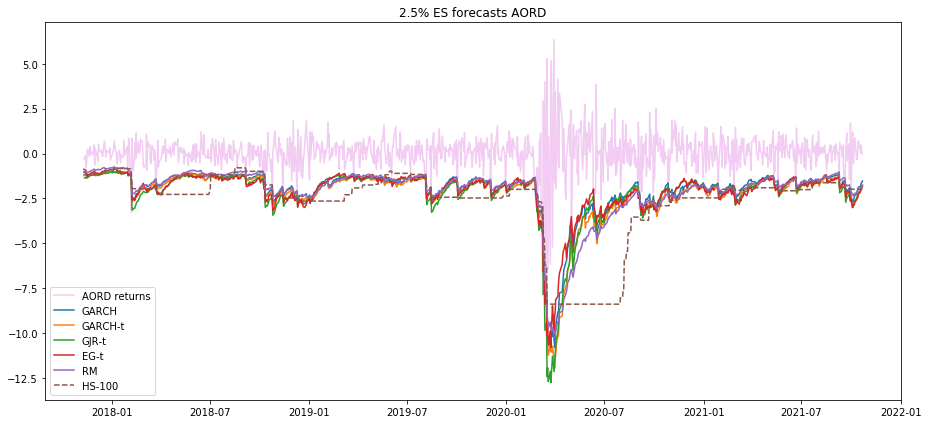

In [31]:
# Plot ES forecasts 2.5%
plt.figure(figsize=(13, 6))
plt.plot(r_ao[frst_fc:], 'm-', alpha=0.2, label='AORD returns')
plt.plot(es25_garch, '-', label='GARCH')
plt.plot(es25_garch_t, '-', label='GARCH-t')
plt.plot(es25_gjr_t, '-', label='GJR-t')
plt.plot(es25_egarch_t, '-', label='EG-t')
plt.plot(es25_rm, '-', label='RM')
plt.plot(es25_hs100, '--', label='HS-100')
plt.title('2.5% ES forecasts AORD')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# ES residuals and scaled ES residuals
xi25_garch, xis25_garch = es_resid(es25_garch, var25_garch, s_garch, r_ao[frst_fc:])
xi1_garch, xis1_garch = es_resid(es1_garch, var1_garch, s_garch, r_ao[frst_fc:])

xi25_garch_t, xis25_garch_t = es_resid(es25_garch_t, var25_garch_t, s_garch_t, r_ao[frst_fc:])
xi1_garch_t, xis1_garch_t = es_resid(es1_garch_t, var1_garch_t, s_garch_t, r_ao[frst_fc:])

xi25_gjr, xis25_gjr = es_resid(es25_gjr, var25_gjr, s_gjr, r_ao[frst_fc:])
xi1_gjr, xis1_gjr = es_resid(es1_gjr, var1_gjr, s_gjr, r_ao[frst_fc:])

xi25_gjr_t, xis25_gjr_t = es_resid(es25_gjr_t, var25_gjr_t, s_gjr_t, r_ao[frst_fc:])
xi1_gjr_t, xis1_gjr_t = es_resid(es1_gjr_t, var1_gjr_t, s_gjr_t, r_ao[frst_fc:])

xi25_egarch_t, xis25_egarch_t = es_resid(es25_egarch_t, var25_egarch_t, s_egarch_t, r_ao[frst_fc:])
xi1_egarch_t, xis1_egarch_t = es_resid(es1_egarch_t, var1_egarch_t, s_egarch_t, r_ao[frst_fc:])

xi25_hs100, xis25_hs100 = es_resid(es25_hs100, var25_hs100, s_hs100, r_ao[frst_fc:])
xi1_hs100, xis1_hs100 = es_resid(es1_hs100, var1_hs100, s_hs100, r_ao[frst_fc:])

xi25_rm, xis25_rm = es_resid(es25_rm, var25_rm, s_rm, r_ao[frst_fc:])
xi1_rm, xis1_rm = es_resid(es1_rm, var1_rm, s_rm, r_ao[frst_fc:])

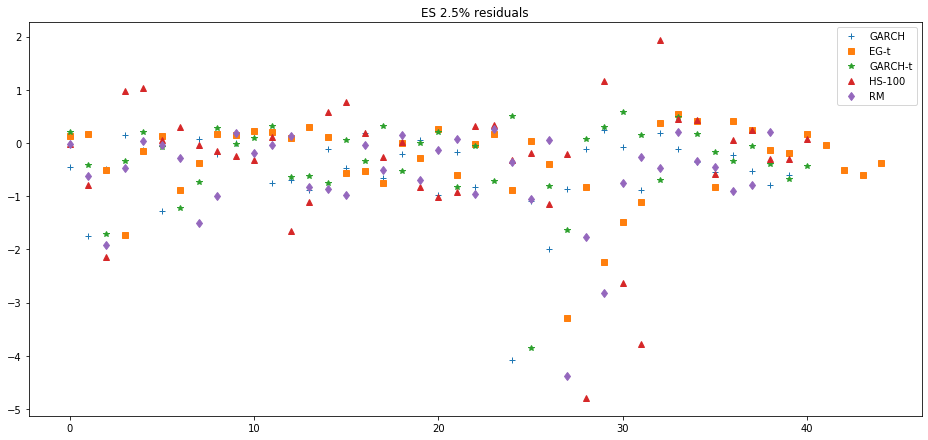

In [16]:
# Plot 2.5% ES residuals
plt.figure(figsize=(13, 6))
plt.plot(xi25_garch.values, '+', label='GARCH')
plt.plot(xi25_egarch_t.values, 's', label='EG-t')
plt.plot(xi25_garch_t.values, '*', label='GARCH-t')
plt.plot(xi25_hs100.values, '^', label='HS-100')
plt.plot(xi25_rm.values, 'd', label='RM')
plt.legend()
plt.tight_layout()
plt.title('ES 2.5% residuals')
plt.show()

### Answer guide
The HS-100 method seems likely the least accurate of these methods at 2.5% ES forecasting, based on its very different ES forecats that do not seem to "hug" the bottom "shoulder" of the data at all, as the other models do. Further, its ES residuals seem to be the most spread out, with many relatively extreme residuals, both positive and negative, in the ES residual plot.

On the other hand, the EG-t and GARCH-t seem potentially the most accurate, as they hug the bottom of the data in the time series plot, recover quickly after Covid in early 2020, and seem to have the fewest extreme ES residuals in the ES residual plot.

#### (c) Formally assess the accuracy of the 2.5% ES forecasts from the different models using the usual measures, i.e. mean residual, mean standardised residual with t-test, joint loss, RMSE and MAD statistics.

In [17]:
def check_es_fc_ex_10(es, var, s, r, p):
    hit = r < es
    n_hit = np.sum(hit)
    xi, xis = es_resid(es, var, s, r)
    rmse = np.sqrt(np.mean(xi ** 2))
    mad = np.mean(np.abs(xi))
    t_xi = ttest(xi, 0)[1]
    t_xis = ttest(xis, 0)[1]
    p_xis = ttest(xis, 0)[0]
    jl = jointloss(es, var, r, p)
    
    return [n_hit, np.mean(xi), t_xi, np.mean(xis), t_xis, p_xis, jl, rmse, mad]

In [18]:
# Table: 2.5% ES checks
tbl_es25_ex = pd.DataFrame({
    'G': check_es_fc_ex_10(es25_garch, var25_garch, s_garch, r_ao[frst_fc:], 0.025),
    'GJR': check_es_fc_ex_10(es25_gjr, var25_gjr, s_gjr, r_ao[frst_fc:], 0.025),
    'EG': check_es_fc_ex_10(es25_egarch, var25_egarch, s_egarch, r_ao[frst_fc:], 0.025),
    'RM': check_es_fc_ex_10(es25_rm, var25_rm, s_rm, r_ao[frst_fc:], 0.025),
    'G-t': check_es_fc_ex_10(es25_garch_t, var25_garch_t, s_garch_t, r_ao[frst_fc:], 0.025),
    'GJR-t': check_es_fc_ex_10(es25_gjr_t, var25_gjr_t, s_gjr_t, r_ao[frst_fc:], 0.025),
    'EG-t': check_es_fc_ex_10(es25_egarch_t, var25_egarch_t, s_egarch_t, r_ao[frst_fc:], 0.025),
    'HS-100': check_es_fc_ex_10(es25_hs100, var25_hs100, s_hs100, r_ao[frst_fc:], 0.025)
    },
    index=['Viol. (10?)', 'Mean xi', 't xi', 'Mean xi/s', 't-stat', 'p-val', 'Joint loss', 'RMSE', 'MAD']
)
tbl_es25_ex.round(4)

,G,GJR,EG,RM,G-t,GJR-t,EG-t,HS-100
Viol. (10?),31.0000,28.0000,28.0000,30.0000,26.0000,24.0000,25.0000,23.0000
Mean xi,-0.5448,-0.4134,-0.5249,-0.6186,-0.3425,-0.2730,-0.3327,-0.3579
t xi,-4.4214,-3.9934,-4.1284,-4.2726,-2.8128,-2.6790,-2.9873,-1.8447
Mean xi/s,-0.6044,-0.4564,-0.5310,-0.7479,-0.3838,-0.3175,-0.3194,-0.5383
t-stat,-5.2359,-4.5444,-4.6786,-5.0984,-3.1364,-3.0577,-2.8778,-2.2427
p-val,0.0000,0.0000,0.0000,0.0000,0.0032,0.0040,0.0062,0.0305
Joint loss,2.1475,2.0765,2.1012,2.2089,2.1107,2.0423,2.0698,2.3718
RMSE,0.9429,0.7812,0.9687,1.0860,0.8429,0.6925,0.8101,1.2783
MAD,0.6156,0.5065,0.6054,0.6864,0.5377,0.4541,0.5260,0.7986


In [34]:
len(es25_garch) * 0.025

25.0

### Answer guide
We generally expect the ES 2.5% level to fall close to the 1% quantile level. None of the models have achieved close to this ES violation rate, with all models having more than double that in fact. 

In terms of the ES residuals for each model, all models have ES residuals whose means are significantly different to 0 (all significantly negative, p-value $<0.05$)). All the models can be rejected and all give significantly biased ES 2.5% forecasts. 

In terms of joint loss, the GJR-t and EG-t are the most accurate joint 2.5% VaR and ES forecast models; HS-100 is the least accurate, as it also is regarding RMSE and MAD of the ES residuals. The GJR-t is the model with lowest RMSE and MAD of the ES residuals.   

#### Repeat parts (b) and (c) for the 1% ES forecasts 

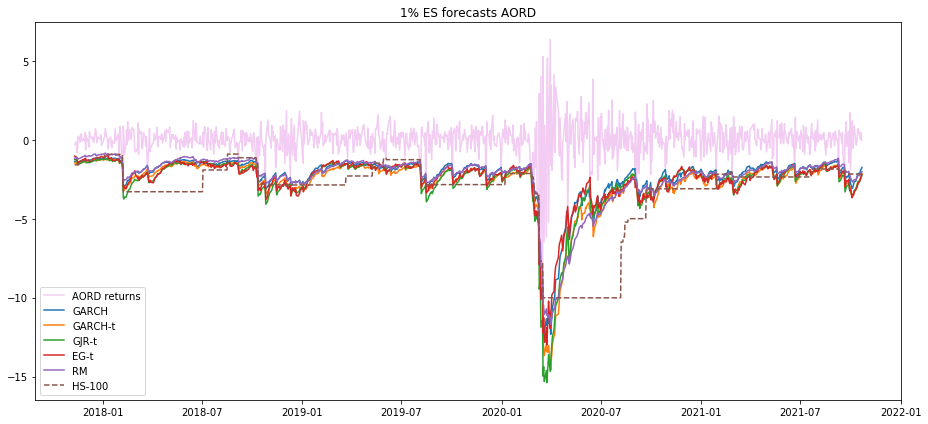

In [19]:
# Plot ES forecasts 1%
plt.figure(figsize=(13, 6))
plt.plot(r_ao[frst_fc:], 'm-', alpha=0.2, label='AORD returns')
plt.plot(es1_garch, '-', label='GARCH')
plt.plot(es1_garch_t, '-', label='GARCH-t')
plt.plot(es1_gjr_t, '-', label='GJR-t')
plt.plot(es1_egarch_t, '-', label='EG-t')
plt.plot(es1_rm, '-', label='RM')
plt.plot(es1_hs100, '--', label='HS-100')
plt.title('1% ES forecasts AORD')
plt.legend()
plt.tight_layout()
plt.show()

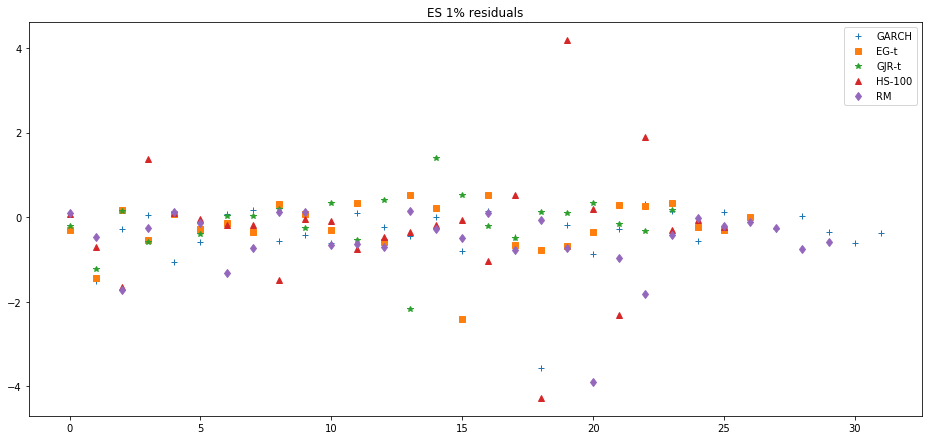

In [20]:
# Plot 1% ES residuals
plt.figure(figsize=(13, 6))
plt.plot(xi1_garch.values, '+', label='GARCH')
plt.plot(xi1_egarch_t.values, 's', label='EG-t')
plt.plot(xi1_gjr_t.values, '*', label='GJR-t')
plt.plot(xi1_hs100.values, '^', label='HS-100')
plt.plot(xi1_rm.values, 'd', label='RM')
plt.legend()
plt.tight_layout()
plt.title('ES 1% residuals')
plt.show()

### Answer guide
The HS-100 method aqgain seems likely the least accurate of these methods at 1% ES forecasting, based on its very different ES forecasts that do not seem to "hug" the bottom "shoulder" of the data at all, as the other models do. Further, its ES residuals again seem to be the most spread out, with many relatively extreme residuals, both positive and negative, in the ES residual plot.

On the other hand, the EG-t and GJR-t seem potentially the most accurate, as they hug the bottom of the data in the time series plot, recover quickly after Covid in early 2020, and seem to have the fewest extreme ES residuals in the ES residual plot.

In [21]:
# Table: 1% ES checks
tbl_es1_ex = pd.DataFrame({
    'G': check_es_fc_ex_10(es1_garch, var1_garch, s_garch, r_ao[frst_fc:], 0.01),
    'GJR': check_es_fc_ex_10(es1_gjr, var1_gjr, s_gjr, r_ao[frst_fc:], 0.01),
    'EG': check_es_fc_ex_10(es1_egarch, var1_egarch, s_egarch, r_ao[frst_fc:], 0.01),
    'RM': check_es_fc_ex_10(es1_rm, var1_rm, s_rm, r_ao[frst_fc:], 0.01),
    'G-t': check_es_fc_ex_10(es1_garch_t, var1_garch_t, s_garch_t, r_ao[frst_fc:], 0.01),
    'GJR-t': check_es_fc_ex_10(es1_gjr_t, var1_gjr_t, s_gjr_t, r_ao[frst_fc:], 0.01),
    'EG-t': check_es_fc_ex_10(es1_egarch_t, var1_egarch_t, s_egarch_t, r_ao[frst_fc:], 0.01),
    'HS-100': check_es_fc_ex_10(es1_hs100, var1_hs100, s_hs100, r_ao[frst_fc:], 0.01)
    },
    index=['Viol. (3?)', 'Mean xi', 't xi', 'Mean xi/s', 't-stat', 'p-val', 'Joint loss', 'RMSE', 'MAD']
)
tbl_es1_ex.round(4)

,G,GJR,EG,RM,G-t,GJR-t,EG-t,HS-100
Viol. (3?),22.0000,20.0000,23.0000,24.0000,16.0000,11.0000,15.0000,19.0000
Mean xi,-0.4189,-0.3362,-0.5342,-0.5816,-0.1508,-0.1148,-0.2324,-0.2382
t xi,-3.3871,-2.7808,-3.8643,-3.9320,-1.0427,-0.8528,-1.9167,-0.8328
Mean xi/s,-0.4825,-0.4215,-0.5620,-0.7068,-0.2327,-0.2031,-0.2656,-0.5038
t-stat,-4.0680,-3.9554,-4.6137,-4.5338,-1.7008,-1.7344,-2.1296,-1.5273
p-val,0.0003,0.0005,0.0001,0.0001,0.1009,0.0962,0.0428,0.1392
Joint loss,2.6180,2.4557,2.5455,2.7838,2.4325,2.2994,2.3895,2.8729
RMSE,0.8060,0.7228,0.8952,0.9863,0.7529,0.6558,0.6605,1.4499
MAD,0.4894,0.4697,0.5905,0.6264,0.4583,0.4351,0.4614,0.8779


In [35]:
len(es1_garch) * 0.01

10.0

### Answer guide
We generally expect the ES 1% level to fall close to the 0.3% - 0.4% quantile level. None of the models have achieved close to this ES violation rate, with all models having more than triple that rate in fact; even the best model (i.e. GJR-t) seems better suited to 1% VaR forecasts than 1% ES forecasts. 

In terms of the ES residuals for each model, most models have ES residuals whose means are significantly different to 0 (all significantly negative, p-value $<0.05$)). These models can be rejected: they give significantly biased ES 1% forecasts. 

Three models did not fail the ES residual test: GARCH-t, GJR-t and HS-100. 

In terms of joint loss, the GJR-t is easily the most accurate joint 1% VaR and ES forecast model; HS-100 is the least accurate, as it also is again regarding RMSE and MAD of the ES residuals. The GJR-t is again the model with lowest RMSE and MAD of the ES residuals. 

#### (e) Briefly discuss and compare the strengths and weaknesses of each of the models in forecasting ES 1-step-ahead for the AORD series. Rank the models on their forecasting performance, separately for 2.5% and 1% risk levels.


#### Answer guide
2.5% ES forecast model ranking:  1. GJR-t; 2. EG-t; 3. GJR-N; 4. GARCH-t; 5. GARCH-N; 6. EG-N; 7. RM; 8. HS-100

Reasoning: 1. GJR-t had the lowest joint loss, plus the lowest RMSE and MAD for ES residuals. It has the 2nd lowest ES violation rate, recovered very well after Covid in 2020 and the closest ES mean residual to 0. Strengths: ES residuals closest to 0 in mean, and lowest variation, ES forecasts follow the data very well and recover quickest after extreme returns; Weaknesses: ES residuals biased, too high ES violation rate.

2. EG-t had the 2nd lowest joint loss, plus the 3rd lowest RMSE and MAD for ES residuals. It had the 3rd lowest ES violation rate, recovered very well after Covid in 2020 and had the ES mean residual 2nd closest to 0. Strengths: ES residuals 2nd closest to 0 in mean, and 3rd lowest variation, ES forecasts follow the data very well and recover quickly after extreme returns; Weaknesses: ES residuals biased, too high ES violation rate.

3. GJR-N had the 3rd lowest joint loss, plus the 2nd lowest RMSE and MAD for ES residuals. It had the 5th lowest ES violation rate, recovered very well after Covid in 2020 and had the ES mean residual 5th closest to 0. Strengths: ES residuals had 2nd lowest variation, ES forecasts follow the data very well and recover quickly after extreme returns; Weaknesses: ES residuals biased and high ES violation rate, too high ES violation rate.

4. HS-100 had the highest joint loss and highest RMSE and MAD for ES residuals. It recovered the slowest and worst after Covd in 2020. However, it had the lowest ES violation rate, the ES mean residual 3rd closest to 0 and the highest p-value on the test (0.03). Strengths: ES forecasts closest to unbiased; Weaknesses: ES forecasts do not follow the data very well, take 100 days to recover after extreme returns or high volatility periods, and ES residuals are the most variable and also biased, too high ES violation rate.

5., 6., 7.  (all similar; ranked 5-7 in most categoies and metrics)

8. RM had the 2nd highest joint loss and 2nd highest RMSE and MAD for ES residuals. It recovered the 2nd slowest and 2nd worst after Covid in 2020. It had the 2nd highest ES violation rate and ES mean residual furthest awy from 0. It was worst or 2nd worst by all metrics here. Strengths: None; Weaknesses: ES forecasts do not follow the data very well, take longest of GARCH-type models to recover after extreme returns or high volatility periods, and ES residuals are the 2nd most variable and also biased, too high ES violation rate.

1% ES forecast model ranking:  1. GJR-t; 2. GARCH-t; 3. HS-100;  4. EG-t; 5. GJR-N; 6. EG-N; 7. GARCH-N; 8. RM

Reasoning: 1. GJR-t had the lowest joint loss, plus the lowest RMSE and MAD for ES residuals. It has the 2nd lowest ES violation rate, recovered very well after Covid in 2020 and was not rejected by the ES mean test, further having the ES mean residual closest to 0. Strengths: ES residuals unbiased and closest to 0 in mean, with lowest variation, ES forecasts follow the data very well and recover quickest after extreme returns; Weaknesses: Still too high ES violation rate.

2. GARCH-t also did not get rejected by the ES mean test, further having the ES mean residual 2nd closest to 0. It had the 3rd lowest joint loss, plus the 4th lowest RMSE and 2nd lowest MAD for ES residuals. It had the 3rd lowest ES violation rate and recovered pretty well after Covid in 2020. Strengths: ES residuals unbiased and 2nd closest to 0 in mean, with 2nd and 4th lowest variation (RMSE and MAD), ES forecasts follow the data well and recover quickly after extreme returns; Weaknesses: Still too high ES violation rate, recover more slowly than GJR and EGARCH models after extreme returns.

3. HS-100 also did not get rejected by the ES mean test, further having the ES mean residual 4th closest to 0 and the 4th lowest ES violation rate. However, it had the highest joint loss and highest RMSE and MAD for ES residuals. It recovered the slowest and worst after Covid in 2020. But it was the 3rd best model to not be rejected. Strengths: ES forecast unbiased; Weaknesses: ES forecasts do not follow the data very well, take 100 days to recover after extreme returns or high volatility periods, and ES residuals are the most variable, too high ES violation rate.

4. EG-t was rejected by the ES mean test. However, it had the 2nd lowest joint loss, plus the 2nd lowest RMSE and 3rd lowest MAD for ES residuals. It had the 2nd lowest ES violation rate, recovered very well after Covid in 2020 and had the ES mean residual 2nd closest to 0. Strengths: ES residuals 2nd closest to 0 in mean (though still biased), with 2nd and 3rd lowest variation (RMSE and MAD), ES forecasts follow the data well and recover quickest (with GJR) after extreme returns; Weaknesses: ES forecasts biased, with still too high ES violation rate.

5. GJR-N was rejected by the ES mean test. However, it had the 4th lowest joint loss, plus the 3rd lowest RMSE and 4th lowest MAD for ES residuals. It had the 5th lowest ES violation rate, recovered very well after Covid in 2020 and had the ES mean residual 5th closest to 0. Strengths: ES residuals 3rd and 4th lowest variation (RMSE and MAD), ES forecasts follow the data well and recover quickly after extreme returns; Weaknesses: ES forecasts biased, with still too high ES violation rate.

6., 7.  (all similar; ranked 6-7 in most categoies and metrics)

8. RM had the 2nd highest joint loss and 2nd highest RMSE and MAD for ES residuals. It recovered the 2nd slowest and 2nd worst after Covid in 2020. It had the highest ES violation rate and ES mean residual furthest away from 0. It was worst or 2nd worst by all metrics here. Strengths: None; Weaknesses: ES forecasts do not follow the data very well, take longest of GARCH-type models to recover after extreme returns or high volatility periods, and ES residuals are the 2nd most variable and also biased, too high ES violation rate.
